In [1]:
## Import packages here
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import lime.lime_tabular

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz, plot_tree
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML201EN-SkillsNetwork/labs/module_4/datasets/hr_new_job_processed.csv"
job_df=pd.read_csv(url)

In [4]:

job_df.describe()

,city_development_index,training_hours,company_size,experience,education_level,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,target
count,11504.000000,11504.000000,11504.000000,11504.000000,11504.000000,11504.000000,11504.000000,11504.000000,11504.000000,11504.000000,11504.000000,11504.000000
mean,0.806056,64.380421,2.748997,9.530985,2.131568,0.029180,0.042537,0.023619,0.005557,0.045442,0.853665,0.500000
std,0.128302,59.048600,1.783676,6.733267,0.627610,0.161802,0.197495,0.147348,0.070875,0.200717,0.342167,0.500022
min,0.448000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.682000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.878000,46.000000,2.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,0.920000,88.000000,3.000000,15.000000,2.247823,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,0.949000,336.000000,7.000000,21.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
X = job_df.loc[:,job_df.columns != 'target']
y = job_df[['target']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=12)

In [7]:
black_box_model = RandomForestClassifier(random_state=123,
                       max_depth=25,
                       max_features=10,
                       n_estimators=100,
                       bootstrap=True)

black_box_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=25, max_features=10, random_state=123)

In [8]:
y_blackbox = black_box_model.predict(X_test)

In [9]:
metrics.roc_auc_score(y_test, y_blackbox)

0.8131250708268802

In [10]:
feature_importances = permutation_importance(estimator=black_box_model, X=X_train, y = y_train,
                                             n_repeats=5, random_state=123, n_jobs=2)

In [11]:
feature_importances.importances.shape

(11, 5)

In [12]:
feature_importances.importances

array([[0.30468326, 0.30109747, 0.30392263, 0.30174943, 0.30479192],
       [0.15527545, 0.15103771, 0.15092904, 0.15190699, 0.15603608],
       [0.18200587, 0.18309247, 0.18537433, 0.18254917, 0.18993806],
       [0.15353689, 0.15114637, 0.15168967, 0.1472346 , 0.1562534 ],
       [0.1201782 , 0.11789634, 0.11561447, 0.11659242, 0.11517983],
       [0.00076062, 0.00065196, 0.00097794, 0.0005433 , 0.0005433 ],
       [0.00206454, 0.00206454, 0.0021732 , 0.00206454, 0.0016299 ],
       [0.00130392, 0.00141258, 0.00141258, 0.00152124, 0.00119526],
       [0.00076062, 0.0005433 , 0.00065196, 0.0005433 , 0.0005433 ],
       [0.00988808, 0.01043138, 0.00988808, 0.01097468, 0.01097468],
       [0.04813648, 0.04857112, 0.04563729, 0.04704988, 0.04900576]])

In [13]:
def visualize_feature_importance(importance_array):
    # Sort the array based on mean value
    sorted_idx = importance_array.importances_mean.argsort()
    # Visualize the feature importances using boxplot
    fig, ax = plt.subplots()
    fig.set_figwidth(16)
    fig.set_figheight(10)
    fig.tight_layout()
    ax.boxplot(importance_array.importances[sorted_idx].T,
               vert=False, tick_labels=X_train.columns[sorted_idx])
    ax.set_title("Permutation Importances (train set)")
    plt.show()

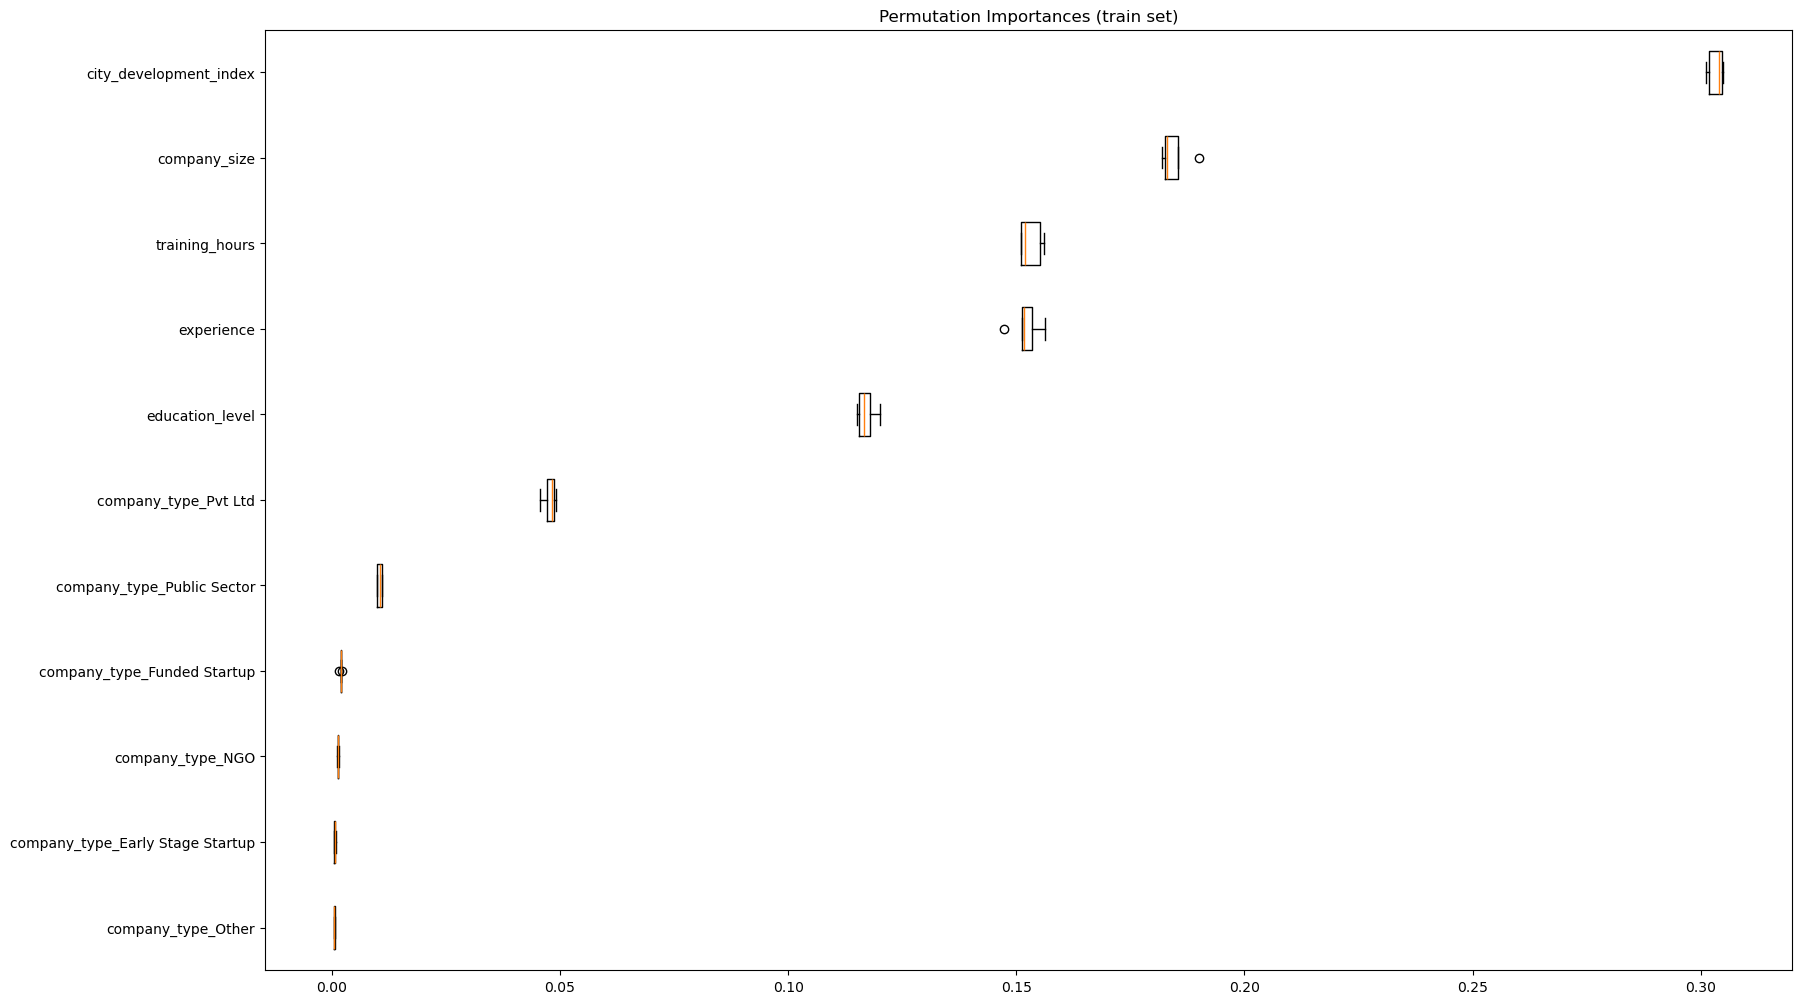

In [14]:
visualize_feature_importance(feature_importances)


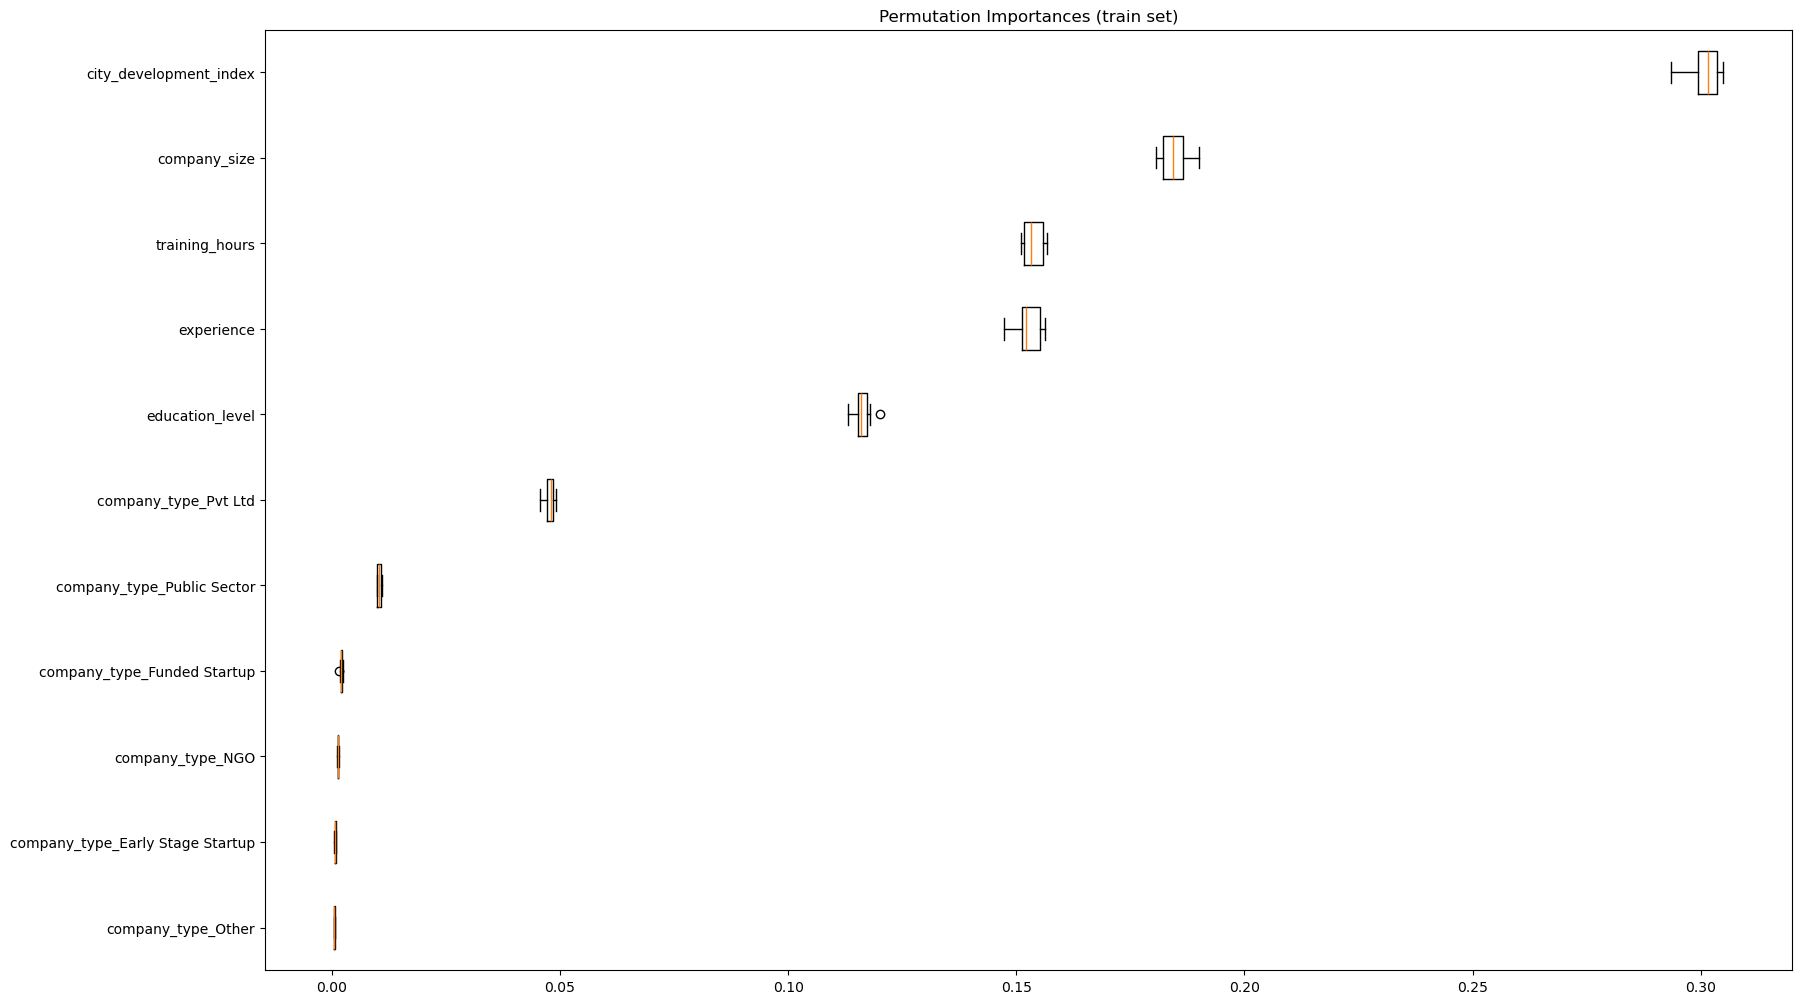

In [15]:
feature_importances = permutation_importance(estimator=black_box_model, X = X_train, y = y_train, n_repeats=10,
                                random_state=123, n_jobs=2)

visualize_feature_importance(feature_importances)

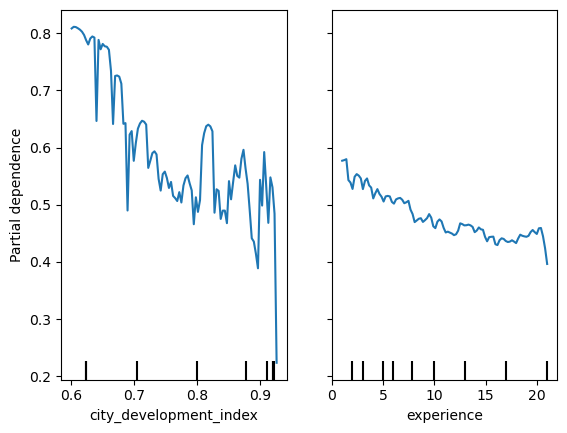

In [16]:
important_features = ['city_development_index', 'experience']

PartialDependenceDisplay.from_estimator(estimator=black_box_model,
                                        X=X_train,
                                        features=important_features,
                                        random_state=123)
plt.show()

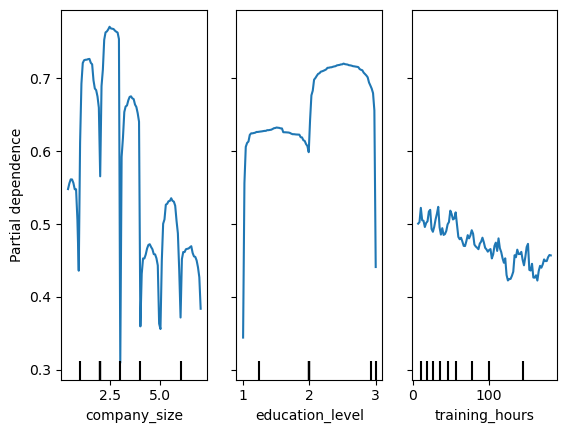

In [17]:
important_features = ['company_size', 'education_level', 'training_hours']
    
PartialDependenceDisplay.from_estimator(estimator=black_box_model, 
                        X=X_train, 
                        features=important_features,
                        random_state=123)

In [18]:
min_max_scaler = StandardScaler()
X_test_minmax = min_max_scaler.fit_transform(X_test)

In [19]:
lm_surrogate = LogisticRegression(max_iter=1000,
                   random_state=123,
                   penalty='l1',
                   solver='liblinear')
lm_surrogate.fit(X_test_minmax, y_blackbox)


LogisticRegression(max_iter=1000, penalty='l1', random_state=123,
                   solver='liblinear')

In [20]:
y_surrogate = lm_surrogate.predict(X_test_minmax)

In [21]:
metrics.accuracy_score(y_blackbox, y_surrogate)

0.7431551499348109

In [23]:
# Extract and sort feature coefficients
def get_feature_coefs(regression_model):
    coef_dict = {}
    # Filter coefficients less than 0.01
    for coef, feat in zip(regression_model.coef_[0, :], X_test.columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

In [24]:
coef_dict= get_feature_coefs(lm_surrogate)
coef_dict

{'city_development_index': -1.1037003758316428,
 'experience': -0.3153460053781262,
 'company_size': -0.31026674911903007,
 'company_type_Funded Startup': -0.2016408367029955,
 'training_hours': -0.15908670450511528,
 'company_type_Early Stage Startup': -0.1313477917545228,
 'company_type_NGO': -0.05280389235903648,
 'company_type_Other': 0.07697385537422016,
 'education_level': 0.15260503732062136,
 'company_type_Pvt Ltd': 0.442463834464927}

In [25]:
# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()
    

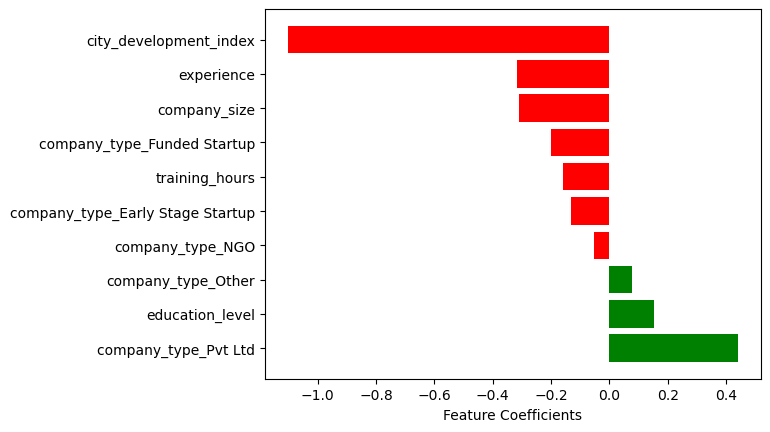

In [26]:
visualize_coefs(coef_dict)


In [27]:
tree_surrogate = DecisionTreeClassifier(random_state=123,
                                        max_depth=5,
                                        max_features=10)

In [28]:
tree_surrogate.fit(X_test, y_blackbox)
y_surrogate = tree_surrogate.predict(X_test)

In [29]:
metrics.accuracy_score(y_blackbox, y_surrogate)


0.8213820078226858

In [30]:
tree_exp = export_text(tree_surrogate, feature_names=list(X_train.columns))

In [31]:
print(tree_exp)


|--- city_development_index <= 0.70
|   |--- experience <= 20.92
|   |   |--- training_hours <= 304.03
|   |   |   |--- company_type_Funded Startup <= 0.99
|   |   |   |   |--- city_development_index <= 0.69
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- city_development_index >  0.69
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- company_type_Funded Startup >  0.99
|   |   |   |   |--- education_level <= 2.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- education_level >  2.50
|   |   |   |   |   |--- class: 0.0
|   |   |--- training_hours >  304.03
|   |   |   |--- class: 0.0
|   |--- experience >  20.92
|   |   |--- city_development_index <= 0.67
|   |   |   |--- education_level <= 2.07
|   |   |   |   |--- training_hours <= 44.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- training_hours >  44.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- education_level >  2.07
|   |   |   |   |--- company_size <= 6.50
|   |   |   |   |   |--- cla

In [32]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_test.values,
    mode='classification',
    class_names=['Not Chaning', 'Changing'],
    feature_names=list(X_train.columns),
    random_state=123,
    verbose=True
)

In [33]:
instance_index = 19
selected_instance = X_test.iloc[[instance_index]]
lime_test_instance = selected_instance.values.reshape(-1)

selected_instance

,city_development_index,training_hours,company_size,experience,education_level,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
8659,0.924,74.0,7.0,16.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0


Intercept 0.9292244657555584
Prediction_local [0.48730243]
Right: 0.030869565217391304


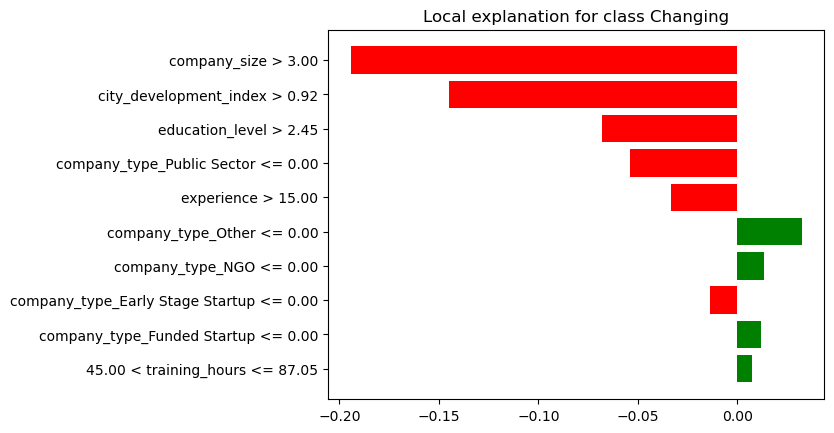

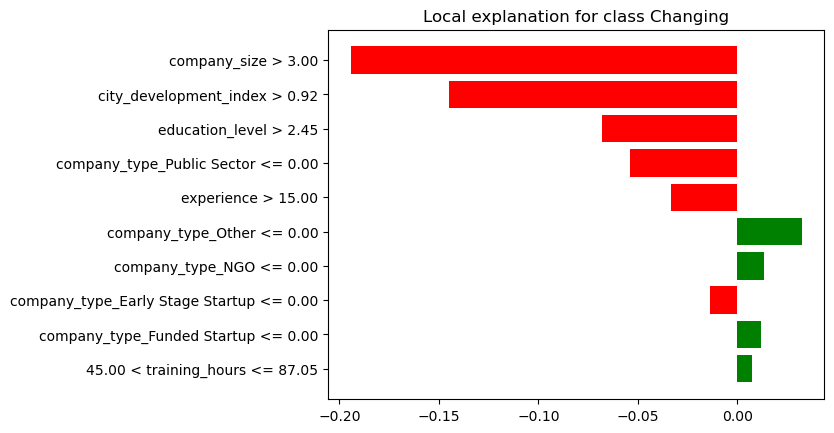

In [35]:
exp = explainer.explain_instance(
    lime_test_instance,
    black_box_model.predict_proba,
    num_features=10
)

exp.as_pyplot_figure()